#Experiment No. 1
Aim: To implement Singular Value Decomposition (SVD)

In [36]:
import numpy as np

In [37]:
# Step 1: Input Matrix
A = np.array([[3, 2, 2], [2, 3, -2]])

In [38]:
# Step 2: Perform SVD
U, S, Vt = np.linalg.svd(A)

In [39]:
# Step 3: Reconstruct A
S_full = np.zeros((U.shape[0], Vt.shape[1]))
np.fill_diagonal(S_full, S)
A_reconstructed = np.dot(U, np.dot(S_full, Vt))

In [40]:
# Step 4: Print Results
print("Original Matrix A:\n", A)
print("\nLeft Singular Matrix (U):\n", U)
print("\nSingular Values (S):\n", S)
print("\nRight Singular Matrix (Vt):\n", Vt)
print("\nReconstructed Matrix A:\n", A_reconstructed)

Original Matrix A:
 [[ 3  2  2]
 [ 2  3 -2]]

Left Singular Matrix (U):
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Singular Values (S):
 [5. 3.]

Right Singular Matrix (Vt):
 [[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]

Reconstructed Matrix A:
 [[ 3.  2.  2.]
 [ 2.  3. -2.]]


# Experiment No. 2
Aim: Study of probability density functions (pdfs) and various statistics

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import norm, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Step 1: Load the dataset
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
iris_df = data.frame
data = iris_df

In [43]:
# Step 2: Exploratory Data Analysis
print("Dataset Head:\n", data.head())
print("\nSummary:\n", data.describe())

Dataset Head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.0

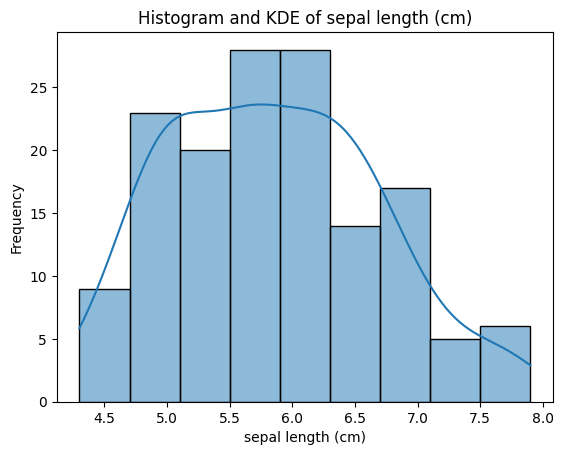

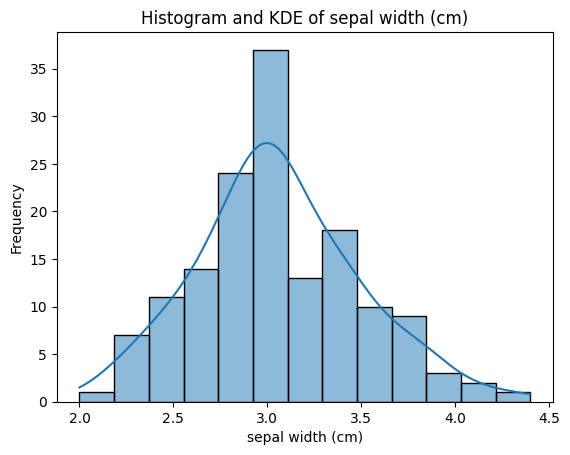

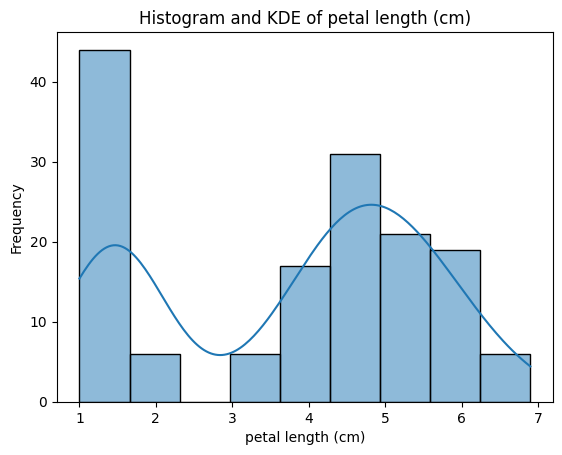

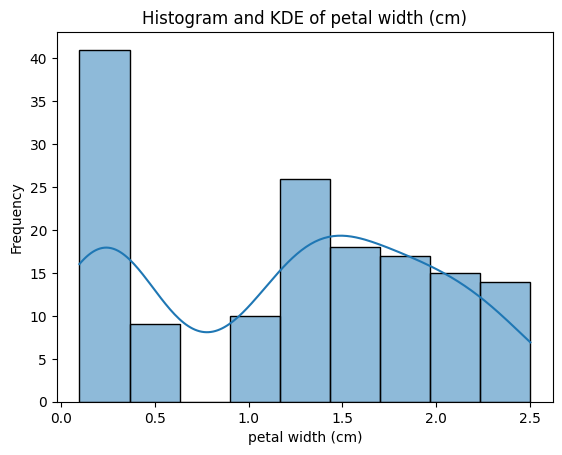

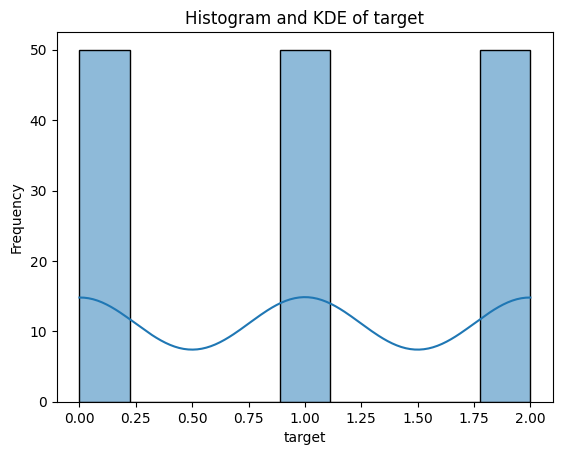

In [44]:
# Step 3: Plot histograms for each variable
variables = data.select_dtypes(include=np.number).columns
for var in variables:
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram and KDE of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


In [45]:
# Step 4: Compute statistics
for var in variables:
    mean_val = np.mean(data[var])
    variance_val = np.var(data[var])
    skewness_val = skew(data[var])
    kurtosis_val = kurtosis(data[var])
    print(f"{var} Statistics:")
    print(f"Mean: {mean_val:.2f}, Variance: {variance_val:.2f}, Skewness: {skewness_val:.2f}, Kurtosis: {kurtosis_val:.2f}")
    print('-' * 40)


sepal length (cm) Statistics:
Mean: 5.84, Variance: 0.68, Skewness: 0.31, Kurtosis: -0.57
----------------------------------------
sepal width (cm) Statistics:
Mean: 3.06, Variance: 0.19, Skewness: 0.32, Kurtosis: 0.18
----------------------------------------
petal length (cm) Statistics:
Mean: 3.76, Variance: 3.10, Skewness: -0.27, Kurtosis: -1.40
----------------------------------------
petal width (cm) Statistics:
Mean: 1.20, Variance: 0.58, Skewness: -0.10, Kurtosis: -1.34
----------------------------------------
target Statistics:
Mean: 1.00, Variance: 0.67, Skewness: 0.00, Kurtosis: -1.50
----------------------------------------


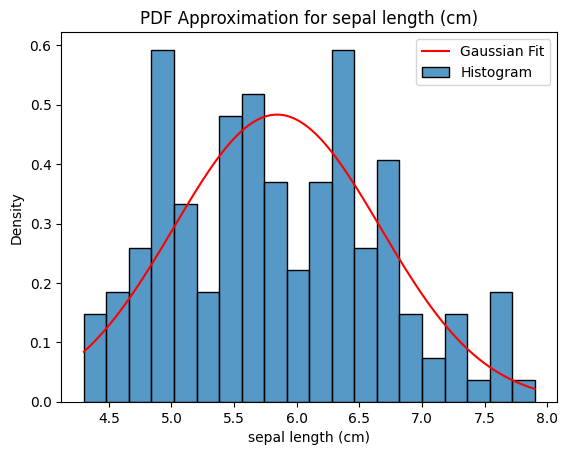

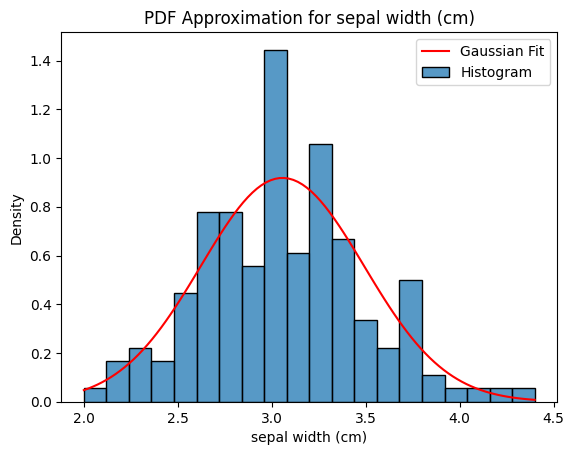

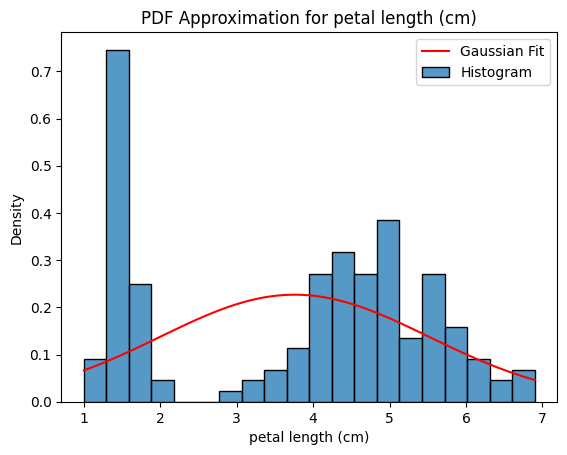

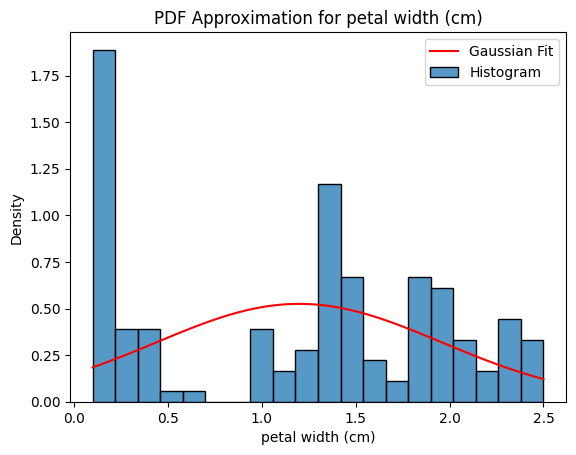

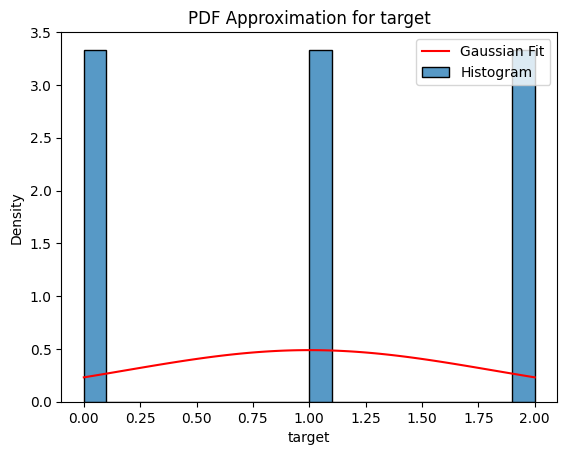

In [46]:
# Step 5: Approximate PDF fitting
for var in variables:
    sns.histplot(data[var], kde=False, stat='density', bins=20, label='Histogram')
    mean, std = norm.fit(data[var])
    x = np.linspace(data[var].min(), data[var].max(), 100)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, 'r-', label='Gaussian Fit')
    plt.title(f"PDF Approximation for {var}")
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


# Experiment No. 3
Aim: Study of logistic regression

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Step 1: Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, random_state=42)

In [49]:
# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Step 3: Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# Step 4: Predict probabilities and classes
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [52]:
# Step 5: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [53]:
# Print performance metrics
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Performance Metrics:
Accuracy: 0.84
Precision: 0.80
Recall: 0.87
F1 Score: 0.83


In [54]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       160
           1       0.80      0.87      0.83       140

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



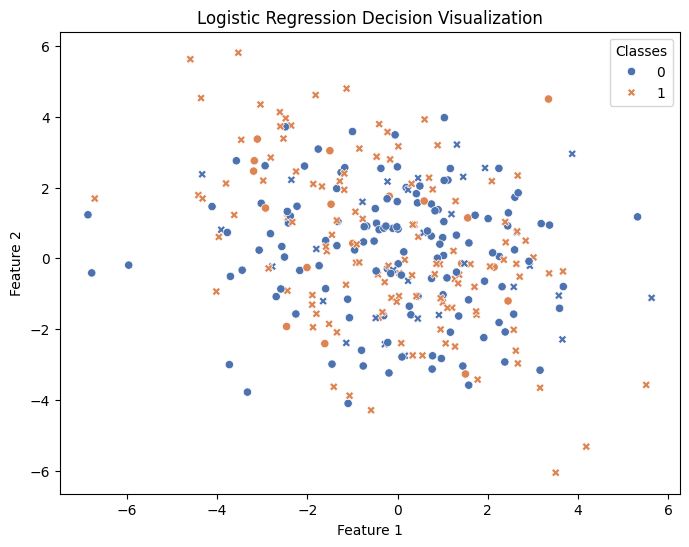

In [55]:
# Step 6: Visualize logistic regression decision boundary (for a 2D case)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=y_pred, palette='deep')
plt.title("Logistic Regression Decision Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Classes")
plt.show()

# Experiment No. 4
Aim: Performance analysis of multivariate linear regression

In [56]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import kagglehub
import warnings
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("shibumohapatra/house-price")
df = pd.read_csv(f"{path}/1553768847-housing.csv")

df.head()

100%|██████████| 387k/387k [00:00<00:00, 49.1MB/s]

Extracting files...


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [57]:
# Encoding the 'ocean_proximity' column
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [58]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [59]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# Checking for missing values
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [61]:
df = df.dropna()
df.isna().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [62]:
# Selecting features and target variable
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
X = df[features]
y = df['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

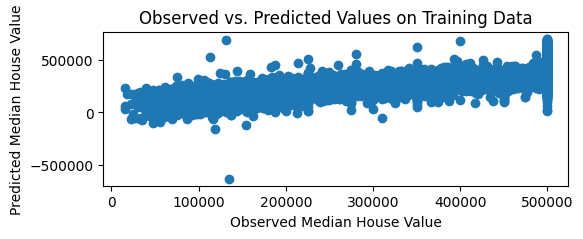

In [63]:
# Plotting observed vs. predicted values for training data
plt.figure(figsize=(6,2))
plt.scatter(y_train, y_pred_train)
plt.xlabel('Observed Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Observed vs. Predicted Values on Training Data')
plt.show()

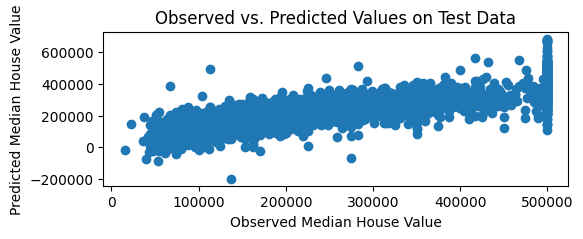

In [64]:
# Plotting observed vs. predicted values for test data
plt.figure(figsize=(6,2))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Observed Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Observed vs. Predicted Values on Test Data')
plt.show()

In [65]:
# Calculating the R-squared value for the training data
r2_train = model.score(X_train, y_train)
print(f'R-squared on Training Data: {r2_train}')

# Calculating the R-squared value for the test data
r2_test = model.score(X_test, y_test)
print(f'R-squared on Test Data: {r2_test}')

R-squared on Training Data: 0.636039119275638
R-squared on Test Data: 0.6399236679243365


In [66]:
# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on Training Data: {mse_train}')
print(f'Mean Squared Error on Test Data: {mse_test}')

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error on Training Data: {mae_train}')
print(f'Mean Absolute Error on Test Data: {mae_test}')

Mean Squared Error on Training Data: 4817705934.657081
Mean Squared Error on Test Data: 4924108937.912002
Mean Absolute Error on Training Data: 50630.49743658007
Mean Absolute Error on Test Data: 51388.700189508156


# Experiment No. 5
Aim: Exploratory Data Analysis using Seaborn

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, iqr

In [68]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

data = pd.read_csv(f"{path}/Iris.csv")


In [69]:
# Step 2: Display the data
print("\nData Head:\n", data.head())
print("\nData Information:")
data.info()


Data Head:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usa

In [70]:
# Step 3: Calculate statistics
print("\nStatistical Summary:")
for col in data.select_dtypes(include=np.number).columns:
    print(f"Statistics for {col}:")
    print(f"Min: {data[col].min():.2f}")
    print(f"Max: {data[col].max():.2f}")
    print(f"Mean: {data[col].mean():.2f}")
    print(f"SD: {data[col].std():.2f}")
    print(f"IQR: {iqr(data[col]):.2f}")
    print(f"Kurtosis: {kurtosis(data[col]):.2f}")
    print('-' * 40)


Statistical Summary:
Statistics for Id:
Min: 1.00
Max: 150.00
Mean: 75.50
SD: 43.45
IQR: 74.50
Kurtosis: -1.20
----------------------------------------
Statistics for SepalLengthCm:
Min: 4.30
Max: 7.90
Mean: 5.84
SD: 0.83
IQR: 1.30
Kurtosis: -0.57
----------------------------------------
Statistics for SepalWidthCm:
Min: 2.00
Max: 4.40
Mean: 3.05
SD: 0.43
IQR: 0.50
Kurtosis: 0.24
----------------------------------------
Statistics for PetalLengthCm:
Min: 1.00
Max: 6.90
Mean: 3.76
SD: 1.76
IQR: 3.50
Kurtosis: -1.40
----------------------------------------
Statistics for PetalWidthCm:
Min: 0.10
Max: 2.50
Mean: 1.20
SD: 0.76
IQR: 1.50
Kurtosis: -1.34
----------------------------------------


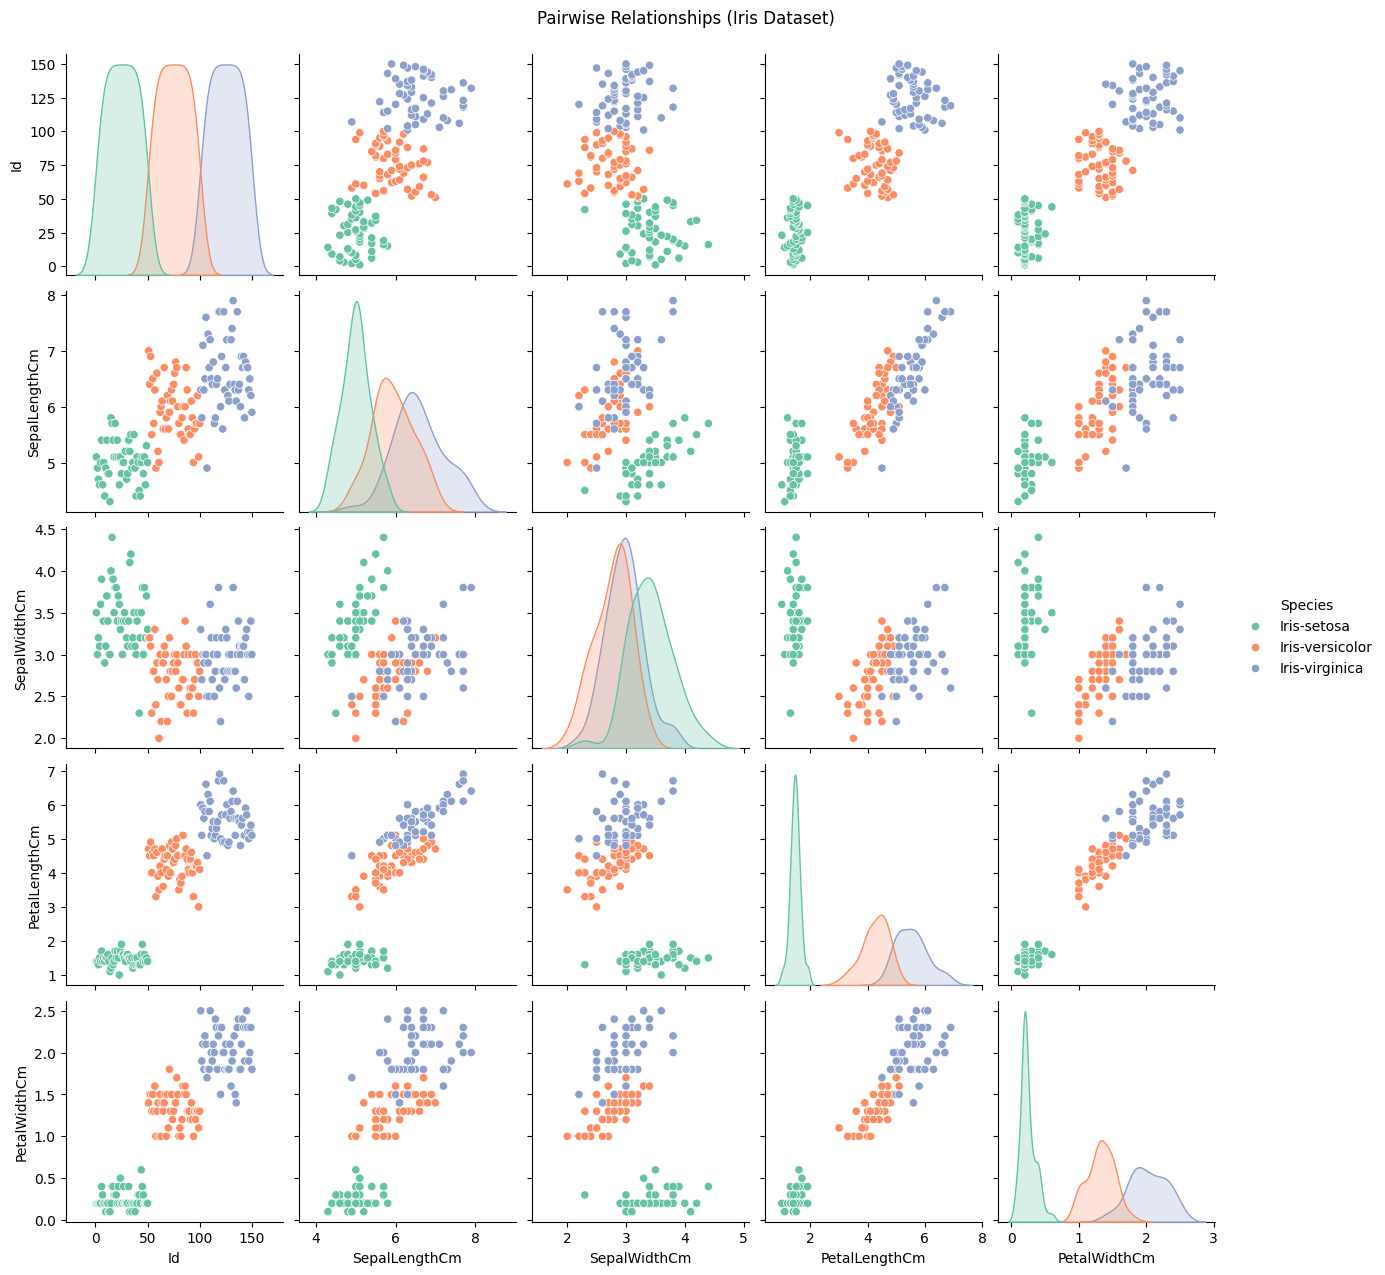

In [71]:
# Step 4: Pairplot
sns.pairplot(data, hue="Species", diag_kind="kde", palette="Set2")
plt.suptitle("Pairwise Relationships (Iris Dataset)", y=1.02)
plt.show()


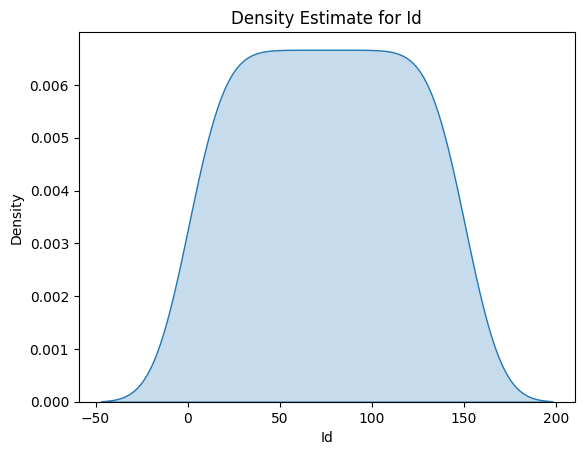

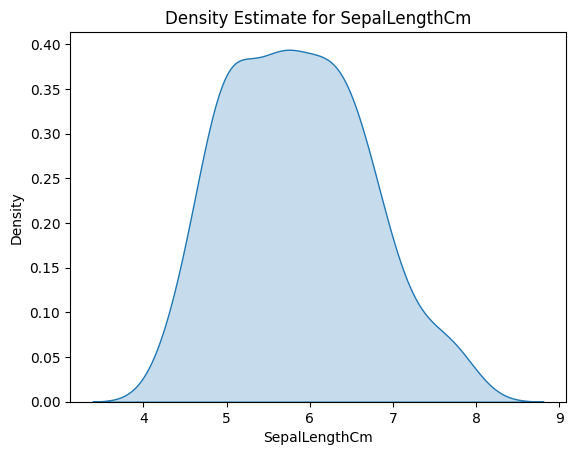

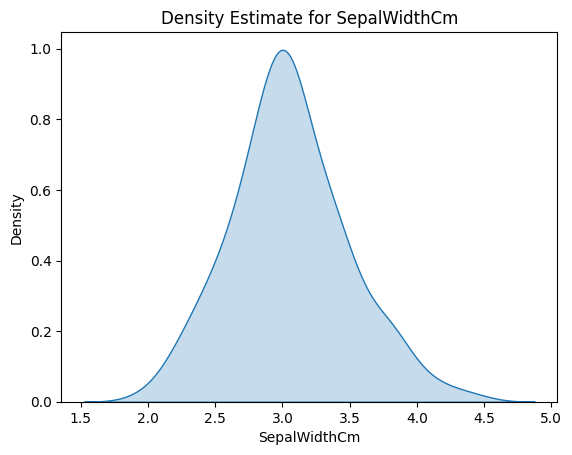

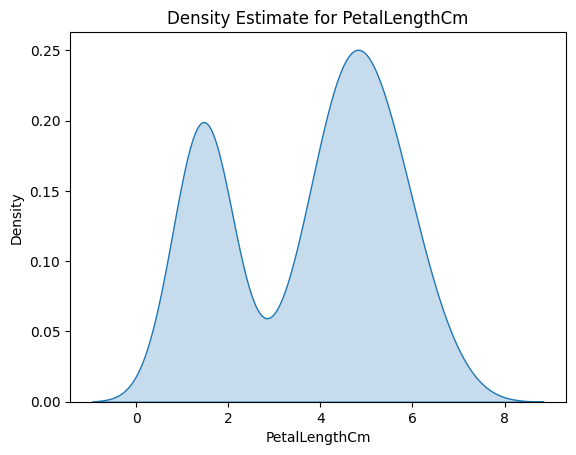

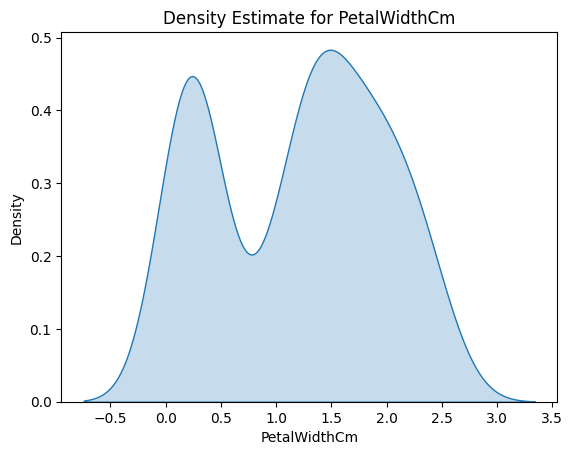

In [72]:
# Step 5: KDE Plot for density estimates
variables = data.select_dtypes(include=np.number).columns
for var in variables:
    sns.kdeplot(data[var], shade=True)
    plt.title(f"Density Estimate for {var}")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.show()

# Experiment No. 6
Aim: Study of ROC curve and AUC computation

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)
import matplotlib.pyplot as plt

In [74]:
# Step 1: Generate a binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42
)

In [75]:
# Step 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# Step 3: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [77]:
# Step 4: Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

In [78]:
# Step 5: Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [79]:
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Performance Metrics:
Accuracy: 0.85
Precision: 0.88
Recall: 0.83
F1 Score: 0.85


In [80]:
# Step 6: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)


In [81]:
# Step 6: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)


In [82]:
print(f"AUC: {auc:.2f}")

AUC: 0.91


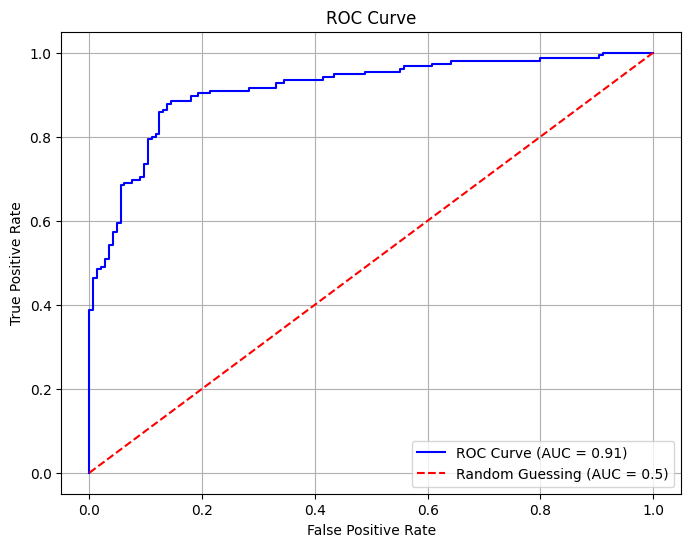

In [83]:
# Step 7: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Experiment No. 7
Aim: Implementation of Principal Component Analysis


In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [85]:
# Step 1: Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [86]:
print("Iris dataset loaded successfully!")

Iris dataset loaded successfully!


In [87]:
# Step 2: Standardize the Data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print("\nData standardized successfully!")


Data standardized successfully!


In [88]:
# Step 3: Apply PCA
pca = PCA(n_components=2)  # Project data to 2 dimensions
X_pca = pca.fit_transform(X_standardized)

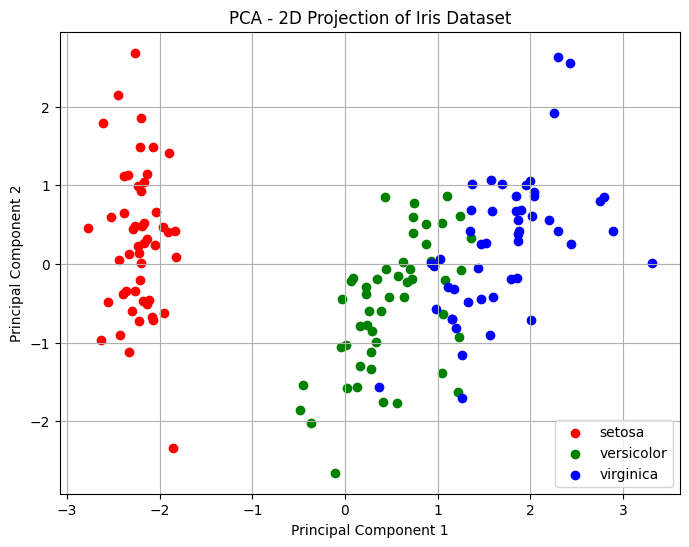

In [89]:
# Step 4: Visualize 2D Projection
plt.figure(figsize=(8, 6))
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label)

plt.title("PCA - 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [90]:
# Step 5: Compute Explained Variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by Each Principal Component:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.2f}")

print(f"\nTotal Variance Explained by First 2 Components: {explained_variance.sum():.2f}")


Explained Variance by Each Principal Component:
Principal Component 1: 0.73
Principal Component 2: 0.23

Total Variance Explained by First 2 Components: 0.96
